In [1]:
import torch 
import torch.nn as nn 
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt

In [2]:
# 0. Prepare data
# 1. Model
# 2. Loss and optimizer
# 3. Training loop

In [3]:
# 0 Prepare data

In [4]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [5]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) # Reshape to 2D array

In [6]:
n_samples, n_features = X.shape 

In [7]:
# 1. Model

In [8]:
input_size = n_features
output_size = 1 

model = nn.Linear(input_size, output_size)

In [9]:
# 2. Loss and optimizer

In [10]:
learning_rate = 0.01

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
# 3. Training loop

Epoch: 10, Loss = 4457.5967
Epoch: 20, Loss = 3322.5400
Epoch: 30, Loss = 2501.8374
Epoch: 40, Loss = 1907.7650
Epoch: 50, Loss = 1477.2953
Epoch: 60, Loss = 1165.0737
Epoch: 70, Loss = 938.4178
Epoch: 80, Loss = 773.7427
Epoch: 90, Loss = 654.0099
Epoch: 100, Loss = 566.8935


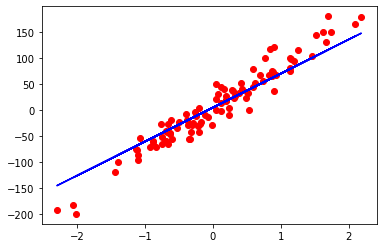

In [12]:
num_epochs = 100

for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)
    # Backward pass
    loss.backward()
    # Update
    optimizer.step()

    # Empty out grads before next epoch!!
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f"Epoch: {epoch+1}, Loss = {loss.item():.4f}")

# Plot
predicted = model(X).detach() # So as to avoid prediction being tracked in computational graph
predicted = predicted.numpy()

plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()